- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from olist.seller import Seller
from olist.product import Product

In [2]:
seller = Seller()

sellers = seller.get_training_data()

In [3]:
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201


# Revenue

In [21]:
# Revenues
revenues_sales = sellers.sales.sum() * 0.1
revenues_subscription = sellers.months_on_olist.sum() * 80
revenues_total = sellers.revenues.sum()

print(
    f'''
Revenues: {revenues_total:.2f} BRL
- Sales: {revenues_sales:.2f} BRL
- Subscriptions: {revenues_subscription:.2f} BRL
''')


Revenues: 2785818.44 BRL
- Sales: 1355578.44 BRL
- Subscriptions: 1430240.00 BRL



# Costs

In [22]:
costs_reviews = sellers.cost_of_reviews.sum()
costs_it = 500_000
costs_total = costs_reviews + costs_it

print(
    f'''
Costs: {costs_total:.2f} BRL
- Reviews: {costs_reviews:.2f} BRL
- IT: {costs_it:.2f} BRL
''')


Costs: 2118210.00 BRL
- Reviews: 1618210.00 BRL
- IT: 500000.00 BRL



# Profit

In [26]:
# Gross Profit, before IT costs
profits_gross = round(sellers.profits.sum(), 2)
profits_gross

1167608.44

In [25]:
# Gross Profit, after IT costs
profits_net = round(profits_gross - costs_it, 2)
profits_net

667608.44

In [31]:
avg_months = round(sellers['months_on_olist'].mean(),1)

print(f"The average amount of time of sellers on Olist is {avg_months} months")

The average amount of time of sellers on Olist is 6.0 months


In [35]:
sellers['months_on_olist'].median()

4.0

### Since the average amount of time of sellers on the Olist platform is 6 months and the median amount of time is 4 months, we will consider that any seller who has been on the platform for 3 months or last to be on the honeymoon phase and therefore, we will not take into consideration for this especific analysis

In [70]:
filtered_sellers = sellers.loc[(sellers['months_on_olist'] > 3) & (sellers['profits'] < 0)].sort_values(by='profits')

filtered_sellers

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,0.124729,0.514100,3.937093,35290,1854,2033,1.096548,123304.83,13770.483,-21519.517
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,0.143809,0.482510,3.827873,39400,1806,1987,1.100221,200472.92,21647.292,-17752.708
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,0.116092,0.584483,4.077586,29530,1706,1775,1.040445,104288.42,11948.842,-17581.158
945,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,0.113935,0.527607,3.997371,20220,1146,1203,1.049738,37177.52,4677.752,-15542.248
315,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,0.118211,0.568690,4.074547,15440,943,1018,1.079533,17535.69,2553.569,-12886.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,8e6cc767478edae941d9bd9eb778d77a,araguari,MG,0.0,16.496238,2017-01-29 19:31:49,2018-06-19 22:55:57,17.0,0.122642,0.547170,3.943396,2090,106,114,1.075472,6830.58,2043.058,-46.942
1344,3d8fa2f5b647373c8620330c4e077a9f,sao paulo,SP,0.0,9.322169,2018-04-30 14:32:34,2018-08-15 20:29:49,4.0,0.116279,0.604651,4.093023,720,43,48,1.116279,3571.73,677.173,-42.827
997,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,0.0,8.543380,2017-12-29 13:26:53,2018-08-29 14:30:23,8.0,0.092025,0.650307,4.245399,2250,164,168,1.024390,15819.10,2221.910,-28.090
1761,e64d65bc8dbec2accda90c58de5d1246,rio claro,SP,0.0,13.493086,2017-11-20 14:06:34,2018-03-15 09:50:48,4.0,0.416667,0.333333,3.083333,500,12,12,1.000000,1678.80,487.880,-12.120


In [42]:
cost_review_sum = round(filtered_sellers['cost_of_reviews'].sum(), 2)
revenue_sum = round(filtered_sellers['revenues'].sum(), 2)
profits_sum = round(filtered_sellers['profits'].sum(), 2)
sales_sum = round(filtered_sellers['sales'].sum(), 2)

In [45]:
print(f"The cost of review that these 149 sellers have for Olist is {cost_review_sum}")
print(f"The revenue they generate is {revenue_sum}")
print(f"The total profit, in this case, loss, that they generate is {profits_sum}")
print(f"The total in sales is  {sales_sum}")

The cost of review that these 149 sellers have for Olist is 739550
The revenue they generate is 453174.18
The total profit, in this case, loss, that they generate is -286375.81
The total in sales is  3074941.85


In [48]:
total_loss = (profits_sum * -1) + cost_review_sum

total_loss

1025925.81

### Together, the 149 sellers with the worst performance, cause a loss of R$1,025,925.81 BRL for Olist


In [67]:
n_sellers = sellers.shape[0]

n_bad_sellers = filtered_sellers.shape[0]

sellers_percent = round(n_bad_sellers / n_sellers, 2) * 100

print(f"The worst performing sellers, represent {sellers_percent}% of the total amount of Olist's seller's base")

The worst performing sellers, represent 5.0% of the total amount of Olist's seller's base


### IT Costs scaling parameteres $\alpha$ and $\beta$

We know that the total IT Costs scale with both the number of sellers (`n_sellers`) and the amount of items they sold (`n_items`)  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  

- $\alpha = 3157.27$
- $\beta = 978.23$

In [68]:
alpha, beta = 3157.27, 978.23
n_items = filtered_sellers.quantity.sum()


In [69]:
def compute_costs_of_it(n_sellers, n_items):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

In [71]:
new_n_sellers = n_bad_sellers - np.arange(1, n_bad_sellers, 1)
new_n_items = n_items - np.cumsum(filtered_sellers.quantity[:-1])

it_costs_per_seller_removed = compute_costs_of_it(new_n_sellers, new_n_items)
review_costs_per_seller_removed = filtered_sellers.cost_of_reviews.sum() - np.cumsum(filtered_sellers.cost_of_reviews[:-1])

In [73]:
STYLES = {'title': {'weight':'heavy', 'name':'Liberation Serif', 'size':16,},
          'labels': {'weight': 'heavy', 'name': 'Liberation Serif', 'size': 14}}

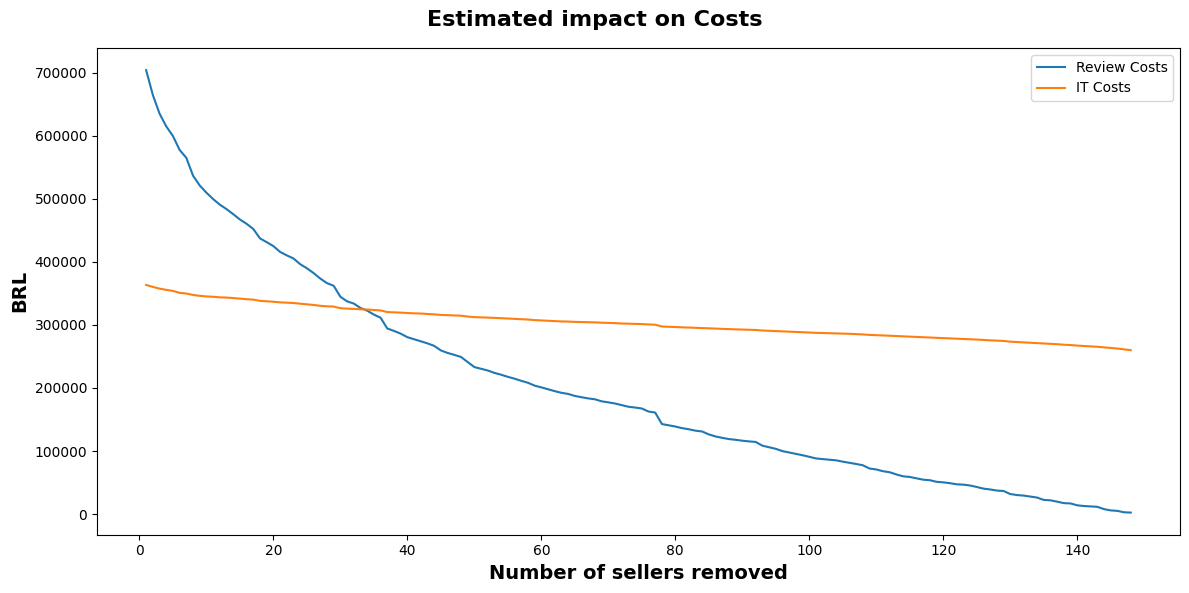

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, n_bad_sellers, 1)

plt.suptitle(t="Estimated impact on Costs",
             **STYLES['title'])

review_costs_line = sns.lineplot(x=x,
                                 y=review_costs_per_seller_removed,
                                 label='Review Costs',
                                 ax=ax)

it_costs_line = sns.lineplot(x=x,
                             y=it_costs_per_seller_removed,
                             label='IT Costs',
                             ax=ax)

ax.set_xlabel('Number of sellers removed',
                  fontdict=STYLES['labels'])
ax.set_ylabel('BRL',
                  fontdict=STYLES['labels'])

ax.tick_params(axis='y')

ax.legend()

fig.tight_layout()

plt.show()

### As shown on the graph, considering IT costs, the removal of 5% of Olist's worst performing sellers would barely have any significant IT costs reduction. On the other hand, it would decrease significantly the review costs.

### Although a decrease in costs cannot be exacly interpreted as increase in profit, it will definately make a difference with the profit margins
